In [1]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter
import matplotlib.pyplot as plt
from sigproc_kit import *
from my_utils import *

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "tp_study/h81_kickstart.asc"


Found Numpy. WIll be used for storing data


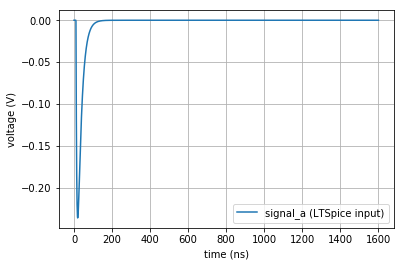

In [2]:
##################################################
##             generate test signal             ##
##################################################

# our samples shall be 100 ms wide
sample_width=1.6e-6
# time step between samples: 0.1 ms
delta_t=1e-9
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)

signal_a = detector_signal_function(time,-150e-12,5e-9,20e-9,10e-9)

plt.plot(time*1e9,signal_a, label="signal_a (LTSpice input)")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.grid(True)

plt.legend()
plt.show()


In [3]:
##################################################
##        apply filter - configuration 1        ##
##################################################

# all values in SI units
configuration_1 = {
  "v_hv":12, # 12V
}

dummy, signal_b1 = apply_ltspice_filter(
      circuit_file,
      time, signal_a,
      params=configuration_1,
      ltspice_command = ltspice_command
      )


trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is newer than h81_kickstart.raw
Normal access


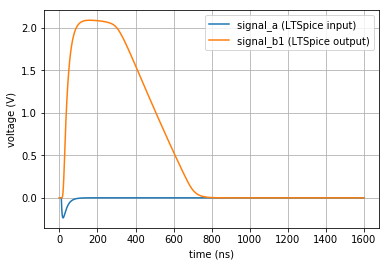

In [4]:
##################################################
##           plot input vs output(s)            ##
##################################################
  
plt.plot(time*1e9,signal_a, label="signal_a (LTSpice input)")
plt.plot(time*1e9,signal_b1, label="signal_b1 (LTSpice output)")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
#plt.ylim((-1,4.5))
plt.grid(True)

plt.legend()
plt.show()

trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h81_kickstart.asc is older than h81_kickstart.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
h8

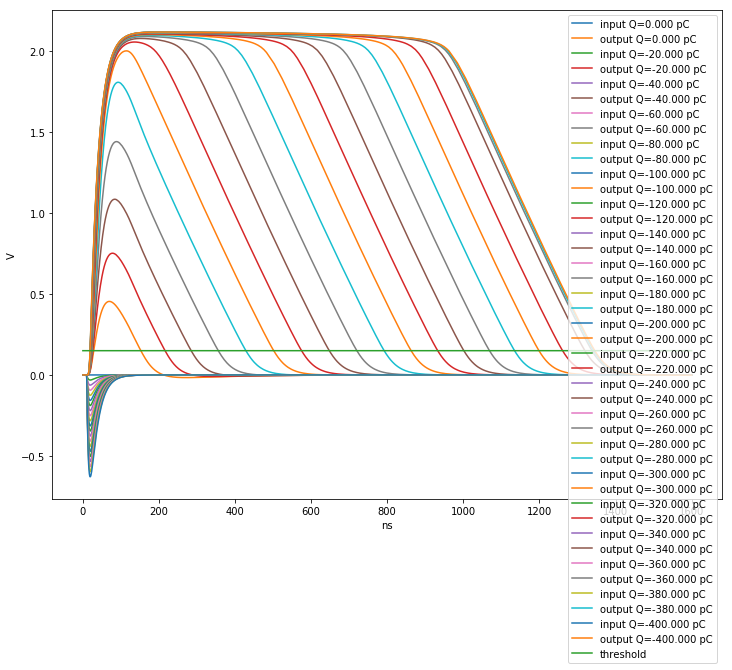

In [5]:
##################################################
##                    Q scan                    ##
##################################################
big_figure()

thresh = 150e-3

Q_list = []
tot_list = []

for Q in np.linspace(0,-400e-12,20+1):
  Q_list += [Q]
  signal_a = detector_signal_function(time,Q,5e-9,20e-9,10e-9)
  dummy, signal_b1 = apply_ltspice_filter(
        circuit_file,
        time, signal_a,
        params=configuration_1,
        ltspice_command = ltspice_command
        )
  dummy, t1, tot = discriminate(time,signal_b1,thresh,0,0)
  tot_list += [tot]
  plt.plot(time*1e9,signal_a, label="input Q={:3.3f} pC".format(Q*1e12))
  plt.plot(time*1e9,signal_b1, label="output Q={:3.3f} pC".format(Q*1e12))
    
plt.plot(time*1e9,time*0 + thresh, label="threshold".format(Q*1e12))

Q = np.array(Q_list)    
tot = np.array(tot_list)
    
plt.legend()
plt.xlabel("ns")
plt.ylabel("V")
plt.show()


(0, 1600)

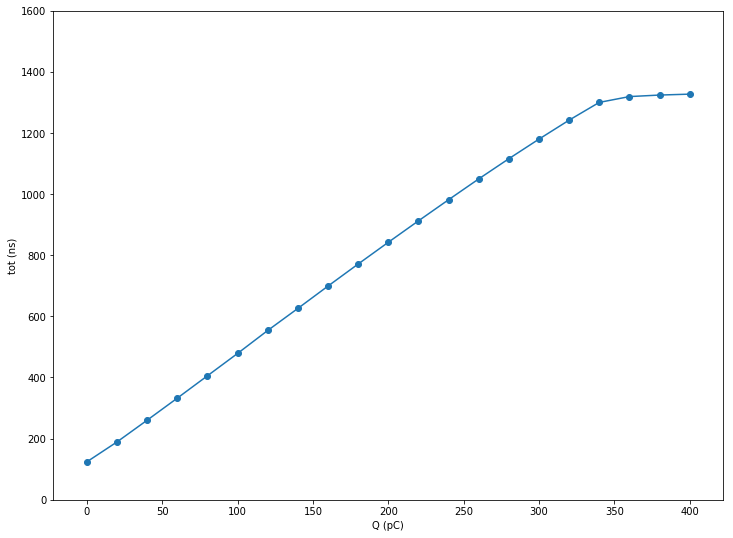

In [6]:
plt.plot(-Q*1e12,tot*1e9)
plt.scatter(-Q*1e12,tot*1e9)
plt.xlabel("Q (pC)")
plt.ylabel("tot (ns)")
plt.ylim(0,1600)

[  3.26076427e+03   1.58765556e-07]
[  3.26076427e+03   1.58765556e-07   1.30000000e-06]


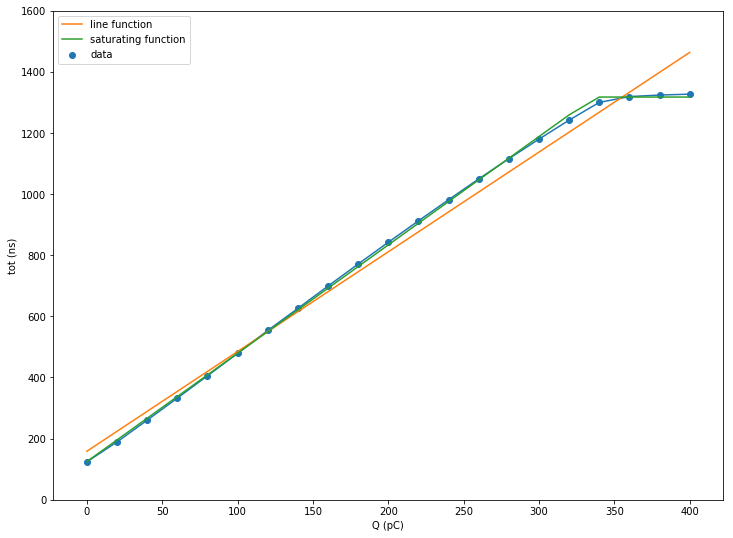

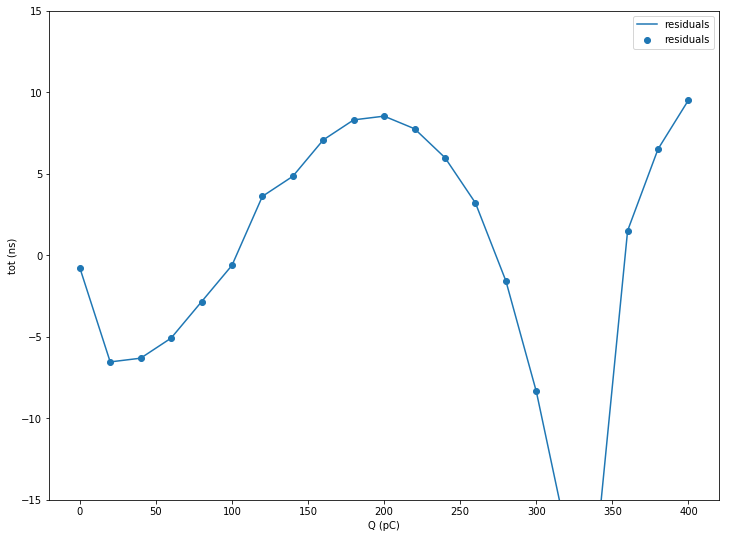

In [32]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

def func2(x, a, b, c):
    val = a * x + b
    val = val*(val<=c) + (val>c)*c
    return val


popt, pcov = curve_fit(func, -Q, tot)

p0 = np.array(list(popt) + [1300e-9])

print(popt)
print(p0)

popt2, pcov2 = curve_fit(func2, -Q, tot,p0=p0)

plt.plot(-Q*1e12,tot*1e9)
plt.scatter(-Q*1e12,tot*1e9,label="data")
plt.plot(-Q*1e12,func(-Q,*popt)*1e9,label="line function")
plt.plot(-Q*1e12,func2(-Q,*popt2)*1e9,label="saturating function")
plt.xlabel("Q (pC)")
plt.ylabel("tot (ns)")
plt.legend()
plt.ylim(0,1600)
plt.show()

plt.scatter(-Q*1e12,tot*1e9 - func2(-Q,*popt2)*1e9,label="residuals")
plt.plot(-Q*1e12,tot*1e9 - func2(-Q,*popt2)*1e9,label="residuals")
plt.xlabel("Q (pC)")
plt.ylabel("tot (ns)")
plt.legend()
plt.ylim(-15,15)
plt.show()

In [9]:
popt

array([  3.26076427e+03,   1.58765556e-07])